In [9]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
import tensorflow as tf
import pandas as pd
import pickle
import numpy as np
import time
import itertools
import scipy.special
import matplotlib.pyplot as plt
import random
from bert_shap import shap_kernel_instance,plot_shap_values

In [11]:
labels = [
    "HS_Individual", "HS_Group", "HS_Religion",
    "HS_Race", "HS_Physical", "HS_Gender"
]

def predict_text(text, tokenizer, model, label_cols):
    inputs = tokenizer(
        text, 
        return_tensors="tf", 
        padding='max_length', 
        truncation=True, 
        max_length=128
    )
    output = model.predict(inputs.data, verbose=0) 
    try:
        logits = output.logits
    except AttributeError:
        logits = output

    probs = tf.sigmoid(logits).numpy()
    
    y_pred_binary = (probs >= 0.5).astype(int)[0] 
    print()
    print(text)
    return dict(zip(label_cols, y_pred_binary))

SAVE_PATH = "..\\..\\saved_models\\model_hs_indobert"

try:
    tokenizer = AutoTokenizer.from_pretrained(SAVE_PATH)
    clf_bert = TFAutoModelForSequenceClassification.from_pretrained(SAVE_PATH)
    print("✅ Model BERT dan Tokenizer berhasil dimuat.")
except Exception as e:
    print(f"❌ Gagal memuat model BERT dari {SAVE_PATH}: {e}")

Some layers from the model checkpoint at ..\..\saved_models\model_hs_indobert were not used when initializing TFBertForSequenceClassification: ['dropout_37']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at ..\..\saved_models\model_hs_indobert.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


✅ Model BERT dan Tokenizer berhasil dimuat.



Jokowi presiden paling buruk sedunia, bangsat emang
{'HS_Individual': 1, 'HS_Group': 0, 'HS_Religion': 0, 'HS_Race': 0, 'HS_Physical': 0, 'HS_Gender': 0} 

Fitur aktif (9): ['jokowi', 'presiden', 'paling', 'buruk', 'sedunia', ',', 'bangsa', '##t', 'emang']
Menjelaskan label: HS_Individual (Index 0)
Jumlah subset yang dipakai: 128
--------------------------------------------------
Kalimat: Jokowi presiden paling buruk sedunia, bangsat emang
Penjelasan untuk: HS_Individual
--------------------------------------------------
buruk: 0.4321
jokowi: 0.1842
paling: 0.1827
bangsa: -0.1708
sedunia: -0.1615
,: -0.1190
emang: 0.1104
##t: -0.0435
presiden: 0.0068

Baseline (E[f(x)]): 0.4948781654379921
Baseline + ΣKernelSHAP: 0.9161446615722695
Prediksi Asli f(x): 0.93732244
Total waktu SHAP: 38.6879 detik


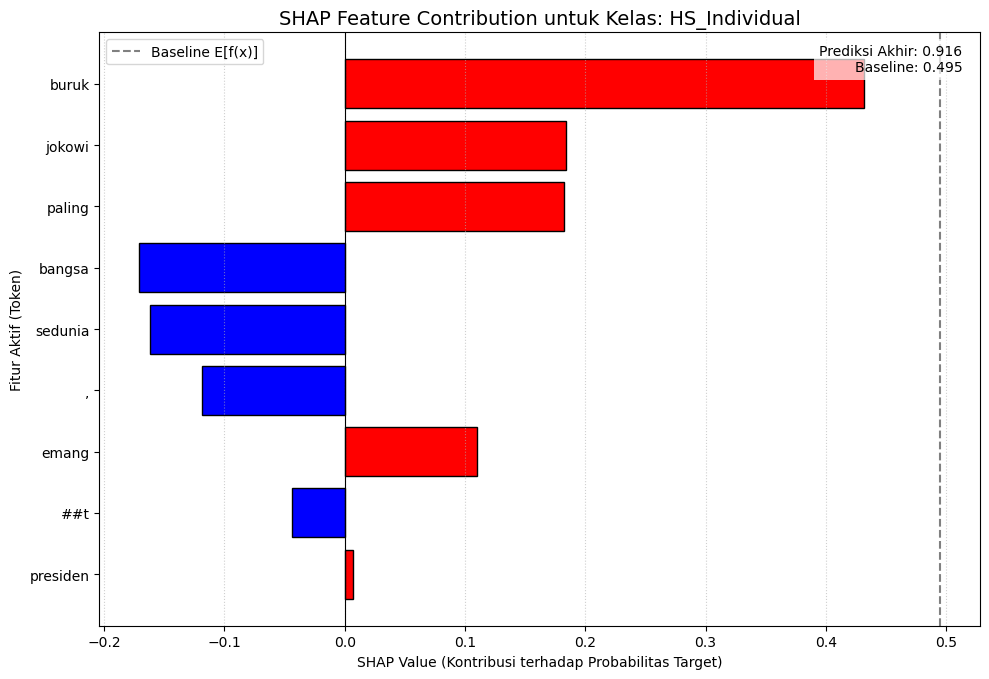

In [22]:
kalimat_tes = "Jokowi presiden paling buruk sedunia, bangsat emang"
print(predict_text(kalimat_tes,tokenizer,clf_bert,labels),"\n")

TARGET_LABEL = 'HS_Individual' 
TARGET_INDEX = labels.index(TARGET_LABEL)


base_value, shap_values, fitur_aktif, sentence, target_label = shap_kernel_instance(
    kalimat_tes, 
    tokenizer, 
    clf_bert, 
    labels, 
    TARGET_LABEL, 
    num_samples=128
)


plot_shap_values(
    base_value=base_value, 
    shap_values=shap_values, 
    fitur_aktif=fitur_aktif, 
    sentence=sentence, 
    target_label=target_label, 
    top_n=10
)


jokowi presiden terbaik dunia akhirat
{'HS_Individual': 0, 'HS_Group': 0, 'HS_Religion': 0, 'HS_Race': 0, 'HS_Physical': 0, 'HS_Gender': 0} 

Fitur aktif (5): ['jokowi', 'presiden', 'terbaik', 'dunia', 'akhirat']
Menjelaskan label: HS_Individual (Index 0)
Jumlah subset yang dipakai: 32
--------------------------------------------------
Kalimat: jokowi presiden terbaik dunia akhirat
Penjelasan untuk: HS_Individual
--------------------------------------------------
terbaik: -0.4133
akhirat: -0.2109
presiden: -0.2022
dunia: -0.1616
jokowi: 0.0959

Baseline (E[f(x)]): 0.7837273112787032
Baseline + ΣKernelSHAP: -0.10830176013107284
Prediksi Asli f(x): 0.0050990726
Total waktu SHAP: 26.8414 detik


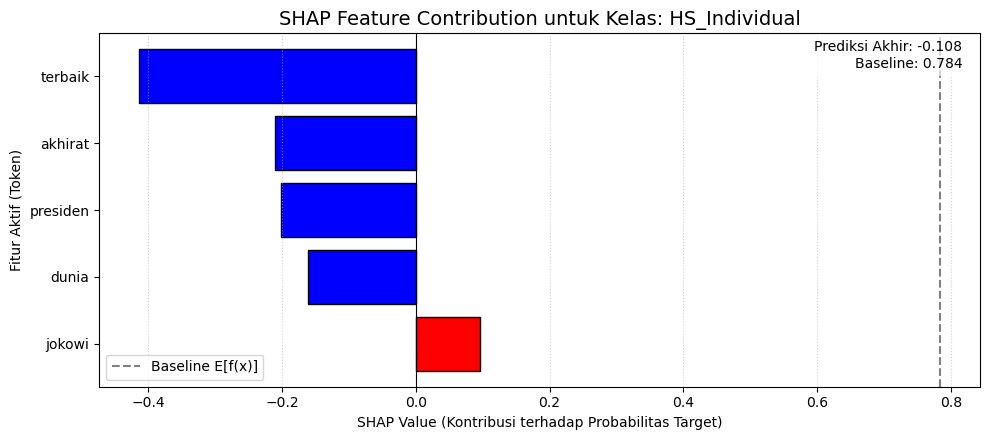

In [23]:
kalimat_tes = "jokowi presiden terbaik dunia akhirat"
print(predict_text(kalimat_tes,tokenizer,clf_bert,labels),"\n")

TARGET_LABEL = 'HS_Individual' 
TARGET_INDEX = labels.index(TARGET_LABEL)


base_value, shap_values, fitur_aktif, sentence, target_label = shap_kernel_instance(
    kalimat_tes, 
    tokenizer, 
    clf_bert, 
    labels, 
    TARGET_LABEL, 
    num_samples=128
)


plot_shap_values(
    base_value=base_value, 
    shap_values=shap_values, 
    fitur_aktif=fitur_aktif, 
    sentence=sentence, 
    target_label=target_label, 
    top_n=10
)